In [101]:
# 1. importer les packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [102]:
data = pd.read_csv('data/Real-state.csv')
data.head(4)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [104]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [105]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

<Axes: >

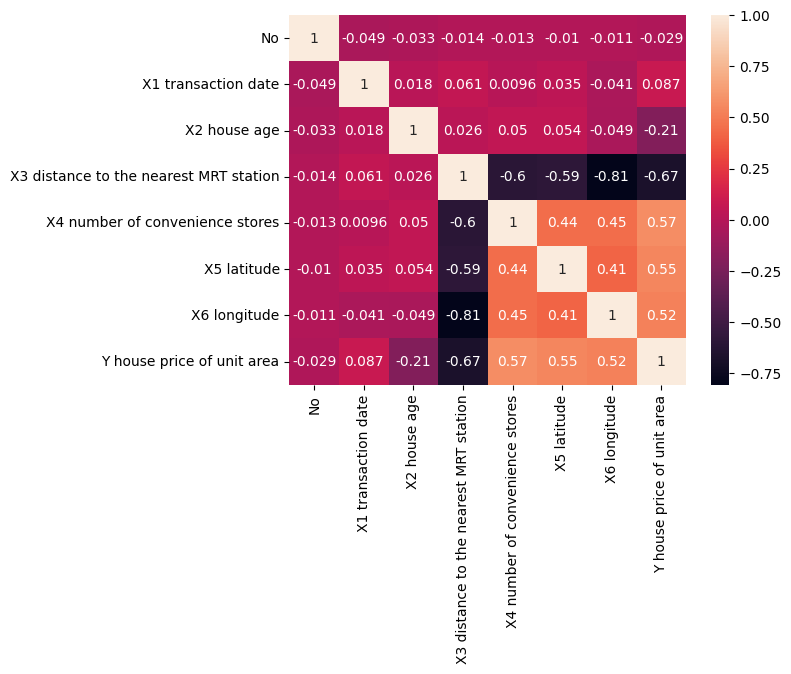

In [106]:
# affichages de la matrice de correlation 
sns.heatmap(data.corr(), annot=True)

In [107]:
data['X4 number of convenience stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0])

In [108]:
data['X5 latitude'].unique()

array([24.98298, 24.98034, 24.98746, 24.97937, 24.96305, 24.97933,
       24.98042, 24.95095, 24.96731, 24.97349, 24.97433, 24.96515,
       24.96108, 24.99156, 24.9824 , 24.97744, 24.97544, 24.9675 ,
       24.96772, 24.96314, 24.97528, 24.95204, 24.97353, 24.97542,
       24.98085, 24.95593, 24.97419, 24.97563, 24.94826, 24.98281,
       24.97841, 24.98419, 25.01459, 24.96386, 24.97201, 24.98203,
       24.94155, 24.94297, 24.98748, 24.97445, 24.97015, 24.9703 ,
       24.94684, 24.94925, 24.974  , 24.95402, 24.94968, 24.97254,
       24.95744, 24.95776, 24.96365, 24.97585, 24.96303, 24.97635,
       24.96571, 24.96674, 24.97964, 24.97587, 24.98343, 24.97723,
       24.96322, 24.97598, 24.95182, 24.96427, 24.96725, 24.96056,
       24.96735, 24.96853, 24.9512 , 24.98573, 24.94783, 24.9748 ,
       24.98569, 24.9492 , 24.9663 , 24.97746, 24.98872, 24.97371,
       24.95618, 24.96398, 24.97707, 24.9726 , 24.96299, 24.97701,
       24.96044, 24.96172, 24.98155, 24.98092, 24.94375, 24.93

In [109]:
data['X5 latitude'].value_counts()

X5 latitude
24.97433    14
24.98203    13
24.96515     9
24.96674     9
24.96299     8
24.95204     8
24.94155     7
24.94297     6
24.97937     6
24.97744     5
24.96571     5
24.97371     5
24.96305     5
24.97110     5
24.97563     4
24.98085     4
24.98872     4
24.98746     4
24.96322     4
24.96412     4
24.97445     3
24.95744     3
24.97349     3
24.96731     3
24.97480     3
24.97528     3
24.96357     3
24.93885     3
24.98569     3
24.98343     3
24.95425     3
24.96606     3
24.97886     3
24.96735     3
24.96334     3
24.97201     2
24.94826     2
24.97015     2
24.97419     2
24.97841     2
24.98298     2
24.95095     2
24.98092     2
24.97707     2
24.97838     2
24.95618     2
24.97213     2
24.98118     2
24.97017     2
24.96622     2
24.97400     2
24.97585     2
24.96853     2
24.94925     2
24.95120     2
24.97723     2
24.95182     2
24.95505     2
24.97003     2
24.97388     2
24.96945     2
24.99176     2
24.96464     2
24.98254     2
24.95885     2
24.97668     

# 4. Division des donnees : train et test

In [110]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [111]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [112]:
pd. set_option('display.max_rows',None)

In [113]:
data.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [114]:
X= data.drop(columns='Y house price of unit area')
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486


In [115]:
X.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486


In [116]:
Y= data[['Y house price of unit area']]
Y.head(2)

,Y house price of unit area
0,37.9
1,42.2


In [117]:
train_test_split(X,Y, train_size=0.8,random_state=40)

[      No  X1 transaction date  X2 house age  \
 405  406             2012.667          23.0   
 248  249             2013.000          19.0   
 185  186             2012.750          31.4   
 370  371             2012.750          15.9   
 336  337             2012.833           5.1   
 23    24             2013.083          10.1   
 54    55             2013.083          16.1   
 58    59             2013.500          30.3   
 256  257             2012.667          14.6   
 69    70             2012.833          12.5   
 221  222             2013.333           9.0   
 167  168             2013.417          28.2   
 198  199             2013.083          34.0   
 183  184             2013.500          17.0   
 298  299             2013.333          16.7   
 173  174             2013.083          41.3   
 349  350             2012.750           7.8   
 0      1             2012.917          32.0   
 365  366             2012.917          17.3   
 403  404             2012.667          

In [118]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.8 ,random_state=25) 

In [119]:
data.shape

(414, 8)

In [120]:
print("X-train Shape :", X_train.shape)
print("X-test Shape :", X_test.shape)
print("Y-train Shape :", Y_train.shape)
print("Y-test Shape :", Y_test.shape)

X-train Shape : (331, 7)
X-test Shape : (83, 7)
Y-train Shape : (331, 1)
Y-test Shape : (83, 1)


In [121]:
model_Ir= LinearRegression()
model_Ir.fit(X_train,Y_train)
model_Ir.predict(X_test)

print(" MS du LR :", mean_squared_error(Y_test,model_Ir.predict(X_test)))
print(" r2 score du LR :", r2_score(Y_test,model_Ir.predict(X_test)))

 MS du LR : 70.20093110639749
 r2 score du LR : 0.617815140252369


# 5.2 random forest

In [134]:
model_rf=  RandomForestRegressor()
model_rf.fit(X_train,Y_train)
model_rf.predict(X_test)

print(" MS du LR :", mean_squared_error(Y_test,model_rf.predict(X_test)))
print(" r2 score du LR :", r2_score(Y_test,model_rf.predict(X_test)))

 MS du LR : 54.27864862650596
 r2 score du LR : 0.7044985388987004


# 5.2 Decision Tree

In [123]:
model_dt=  DecisionTreeRegressor()
model_dt.fit(X_train,Y_train)
model_dt.predict(X_test)

print(" MS du LR :", mean_squared_error(Y_test,model_dt.predict(X_test)))
print(" r2 score du LR :", r2_score(Y_test,model_dt.predict(X_test)))

 MS du LR : 68.7566265060241
 r2 score du LR : 0.6256781606201467


# 6. faire de predictions simple

In [124]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [125]:
model_rf.predict([[1	,2012.917,	32.0	,84.87882	,10	,24.98298	,121.54024]])

C:\Users\HP\anaconda3\envs\bac3_GL_IA_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([42.399])

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
prediction_simple= model_rf.predict([[1	,2012.917,	32.0	,84.87882	,10	,24.98298	,121.54024]])

In [132]:
print(prediction_simple)

[42.399]
